In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from pathlib import Path
import os
import sys
from IPython.display import display

In [3]:
def on_kaggle() -> bool:
    try:
        import gresearch_crypto
        return True
    except ModuleNotFoundError:
        return False

In [4]:
# HYPER PARAMETERS
ON_KAGGLE = on_kaggle()
SAMPLE_LEVEL = 2
USE_SAMPLE = SAMPLE_LEVEL == 1
USE_TOY_SAMPLE = SAMPLE_LEVEL == 2

FORCE_REWRITE = (ON_KAGGLE and SAMPLE_LEVEL == 0)

In [5]:
if not ON_KAGGLE and os.path.abspath('.').endswith('notebook'):
    os.chdir('../')

In [6]:
#IMPORT_SCRIPT!
# THIS CELL WILL BE REMOVE WITH SCRIPTS IN SRC
if './src/' not in sys.path:
    sys.path.append('./src/')

from preprocessing import *
from metrics import *

In [7]:
if ON_KAGGLE:
    RAW_DIR = Path('../input/g-research-crypto-forecasting/')
    SAMPLE_DIR = Path('../input/create-sample-dataset/data/raw/sample/')
    TOY_SAMPLE_DIR = Path('../input/create-sample-dataset/data/raw/toy_sample/')
else:
    RAW_DIR =  Path('data/raw')
    TOY_SAMPLE_DIR = RAW_DIR.joinpath('toy_sample')
    SAMPLE_DIR = RAW_DIR.joinpath('sample')

# filename
TRAIN_FILE = 'train.csv'
ASSET_DETAILS_PATH = RAW_DIR / 'asset_details.csv'

In [8]:
if USE_TOY_SAMPLE:
    print('USING TOY DATASET')
    RAW_TRAIN_PATH = TOY_SAMPLE_DIR / TRAIN_FILE

elif USE_SAMPLE:
    print('USING SAMPLE DATASET')
    RAW_TRAIN_PATH = SAMPLE_DIR / TRAIN_FILE

else:
    print('USING RAW DATASET')
    RAW_TRAIN_PATH = RAW_DIR / TRAIN_FILE

assert RAW_TRAIN_PATH.exists()

USING RAW DATASET


In [9]:
!ls {RAW_DIR}

asset_details.csv		   sample
example_sample_submission.csv	   supplemental_train.csv
example_test.csv		   toy_sample
g-research-crypto-forecasting.zip  train.csv
gresearch_crypto


In [10]:
%%time 
raw_df = pd.read_csv(RAW_TRAIN_PATH)

CPU times: user 27.3 s, sys: 4.12 s, total: 31.4 s
Wall time: 34.5 s


In [11]:
raw_df = ingest_data(raw_df, asset_details_path=ASSET_DETAILS_PATH)

In [12]:
raw_df.sort_values(by=['Asset_ID', 'date'], inplace=True)
raw_df.reset_index(drop=True, inplace=True)

In [13]:
raw_df.head()

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target,Asset_Name,date
0,1514764860,0,5.0,8.5300,8.5300,8.5300,8.5300,78.38,8.530000,-0.014399,Binance Coin,2018-01-01 00:01:00
1,1514764920,0,7.0,8.5300,8.5300,8.5145,8.5145,71.39,8.520215,-0.015875,Binance Coin,2018-01-01 00:02:00
2,1514764980,0,45.0,8.5065,8.5299,8.4848,8.4848,1546.82,8.501393,-0.015410,Binance Coin,2018-01-01 00:03:00
3,1514765040,0,14.0,8.5009,8.5066,8.4744,8.5009,125.80,8.479810,-0.012524,Binance Coin,2018-01-01 00:04:00
4,1514765100,0,5.0,8.5007,8.5007,8.4560,8.4560,125.01,8.458435,-0.005940,Binance Coin,2018-01-01 00:05:00


In [14]:
TARGET = 'Target'
INDEX_COLS = ['Asset_ID', 'Asset_Name', 'date', 'timestamp']

In [15]:
feature_data = compute_features(raw_df)

In [16]:
feature_data = feature_data.dropna(subset=[TARGET]).reset_index(drop=True)

In [17]:
feature_data.head()

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target,Asset_Name,date,upper_shadow,lower_shador
0,1514764860,0,5.0,8.5300,8.5300,8.5300,8.5300,78.38,8.530000,-0.014399,Binance Coin,2018-01-01 00:01:00,0.000000,0.000000
1,1514764920,0,7.0,8.5300,8.5300,8.5145,8.5145,71.39,8.520215,-0.015875,Binance Coin,2018-01-01 00:02:00,0.000000,0.000000
2,1514764980,0,45.0,8.5065,8.5299,8.4848,8.4848,1546.82,8.501393,-0.015410,Binance Coin,2018-01-01 00:03:00,0.023399,0.000000
3,1514765040,0,14.0,8.5009,8.5066,8.4744,8.5009,125.80,8.479810,-0.012524,Binance Coin,2018-01-01 00:04:00,0.005700,0.026501
4,1514765100,0,5.0,8.5007,8.5007,8.4560,8.4560,125.01,8.458435,-0.005940,Binance Coin,2018-01-01 00:05:00,0.000000,0.000000


In [18]:
feature_data.tail()

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target,Asset_Name,date,upper_shadow,lower_shador
23486463,1632181200,13,986.0,0.090885,0.091054,0.090710,0.090941,5.734456e+06,0.090831,0.000199,TRON,2021-09-20 23:40:00,0.000113,0.000175
23486464,1632181260,13,715.0,0.091010,0.091277,0.090980,0.091203,1.989048e+06,0.091125,-0.003477,TRON,2021-09-20 23:41:00,0.000074,0.000030
23486465,1632181320,13,527.0,0.091171,0.091295,0.091092,0.091180,2.386078e+06,0.091185,-0.002437,TRON,2021-09-20 23:42:00,0.000115,0.000079
23486466,1632181380,13,463.0,0.091206,0.091290,0.091028,0.091081,1.568854e+06,0.091131,0.004843,TRON,2021-09-20 23:43:00,0.000084,0.000053
23486467,1632181440,13,512.0,0.090989,0.091133,0.090831,0.090885,1.900695e+06,0.090943,0.004163,TRON,2021-09-20 23:44:00,0.000144,0.000054


In [19]:
PULIC_LB_RANGE = ['2021-06-13 00:00:00',
                  '2021-09-13 00:00:00'] # 3 MONTH WORTH OF DATA

if USE_TOY_SAMPLE:
    EVAL_PERIODS = ['2021-09-15', '2021-09-22']

else:
    EVAL_PERIODS = PULIC_LB_RANGE

In [20]:
valid_idx = feature_data['date'].between(*EVAL_PERIODS)
train_idx = feature_data['date'] < EVAL_PERIODS[0]

In [21]:
train_data = feature_data.loc[train_idx, :].reset_index(drop=True)
valid_data = feature_data.loc[valid_idx, :].reset_index(drop=True)

In [22]:
assert train_data.date.max() < pd.to_datetime(EVAL_PERIODS[0]), \
       'train set includes future data'

In [23]:
train_data.date.dt.date.nunique()

1259

In [24]:
valid_data.date.dt.date.nunique()

93

In [25]:
COLUMNS_TO_DROP = [TARGET, 'Asset_Name', 'date', 'timestamp', 'Asset_ID']
FEATURES = train_data.columns.drop(COLUMNS_TO_DROP)
MODEL_PARAMS = {
#  'learning_rate': 0.05,
#  'subsample': 0.9,
#  'colsample_bytree': 0.7,
#  'random_state': 2021
    'alpha': 0.01,
    'normalize': True
}
OUTPUT_PATH = Path('artifacts/baseline/')
if SAMPLE_LEVEL > 0:
    OUTPUT_PATH = OUTPUT_PATH / f'sample/{SAMPLE_LEVEL}'
OUTPUT_PATH.mkdir(exist_ok=True, parents=True)

In [26]:
FEATURES

Index(['Count', 'Open', 'High', 'Low', 'Close', 'Volume', 'VWAP',
       'upper_shadow', 'lower_shador'],
      dtype='object')

In [27]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import Lasso, Ridge
import joblib

In [28]:
%%time
CRYPTO_MODELS = {}
valid_yhat = np.zeros(len(valid_data))
for crypto, train_crypto in train_data.groupby(by=['Asset_Name']):
    print(f'training model for {crypto}')
    model_path = OUTPUT_PATH / f'{crypto}.pkl'
    if model_path.exists() and (not FORCE_REWRITE):
        model = joblib.load(model_path)
    else:
        model = Ridge(**MODEL_PARAMS)
        model.fit(train_crypto[FEATURES], train_crypto[TARGET])
        joblib.dump(model, model_path)
    CRYPTO_MODELS[crypto] = model
    crypto_index = valid_data['Asset_Name'] == crypto
    valid_yhat[crypto_index] = model.predict(valid_data.loc[crypto_index, FEATURES])
    

training model for Binance Coin
training model for Bitcoin
training model for Bitcoin Cash
training model for Cardano
training model for Dogecoin
training model for EOS.IO
training model for Ethereum
training model for Ethereum Classic
training model for IOTA
training model for Litecoin
training model for Maker
training model for Monero
training model for Stellar
training model for TRON
CPU times: user 1min 42s, sys: 1.46 s, total: 1min 43s
Wall time: 30.7 s


In [29]:
valid_data['yhat'] = valid_yhat

In [30]:
scores, valid_corrs = compute_metrics(valid_data)

In [31]:
scores

theor_corr       0.000748
weighted_corr    0.000132
corr_min        -0.027588
corr_max         0.017823
corr_std         0.010633
dtype: float64

In [32]:
valid_corrs

,Asset_Name,corr,weight,weighted_corr
0,Binance Coin,0.003087,4.304065,0.013288
1,Bitcoin,-0.003122,6.779922,-0.021168
2,Bitcoin Cash,-0.027588,2.397895,-0.066154
3,Cardano,-0.007444,4.406719,-0.032804
4,Dogecoin,0.010640,3.555348,0.037831
5,EOS.IO,0.004010,1.386294,0.005559
6,Ethereum,-0.004576,5.894403,-0.026974
7,Ethereum Classic,0.006485,2.079442,0.013485
8,IOTA,0.000108,1.098612,0.000118
9,Litecoin,0.017823,2.397895,0.042737


<AxesSubplot:xlabel='Asset_Name'>

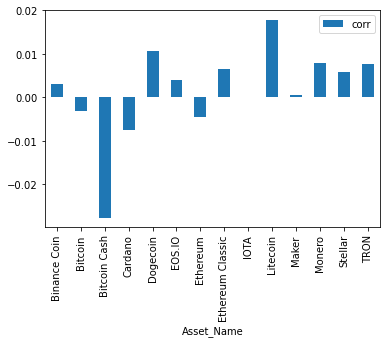

In [33]:
valid_corrs.plot.bar('Asset_Name', 'corr')

In [34]:
# if SAMPLE_LEVEL == 0:
#     scores_mean = cv_scores.mean().to_dict()
#     valid_corrs.to_csv(OUTPUT_PATH / 'corrs.csv', index=False)

#     cv_scores.to_csv(OUTPUT_PATH / 'cv_scores.csv', index=False)

#     _config = {'model': MODEL_PARAMS}
#     track_experiment('linear-model-per-crypto', mlflow_experiment='leaderboard',
#                      config=_config,
#                      scores=scores_mean, artifacts_dir=str(OUTPUT_PATH))

### recreating target 

In [36]:
def ResidualizeMarket(df, mktColumn, window):
    if mktColumn not in df.columns:
        return df

    mkt = df[mktColumn]

    num = df.multiply(mkt.values, axis=0).rolling(window).mean().values  #numerator of linear regression coefficient
    denom = mkt.multiply(mkt.values, axis=0).rolling(window).mean().values  #denominator of linear regression coefficient
    beta = np.nan_to_num( num.T / denom, nan=0., posinf=0., neginf=0.)  #if regression fell over, use beta of 0

    resultRet = df - (beta * mkt.values).T  #perform residualization
    resultBeta = 0.*df + beta.T  #shape beta

    return resultRet.drop(columns=[mktColumn]), resultBeta.drop(columns=[mktColumn])

In [40]:
from metrics import ASSET_WEIGHT

In [38]:
df_time = pd.pivot(raw_df, 'timestamp', 'Asset_Name', 'Close')

Bitcoin Cash        2.397895
Binance Coin        4.304065
Bitcoin             6.779922
EOS.IO              1.386294
Ethereum Classic    2.079442
Ethereum            5.894403
Litecoin            2.397895
Monero              1.609438
TRON                1.791759
Stellar             2.079442
Cardano             4.406719
IOTA                1.098612
Maker               1.098612
Dogecoin            3.555348
dtype: float64

In [39]:
df_time.head()

Asset_Name,Binance Coin,Bitcoin,Bitcoin Cash,Cardano,Dogecoin,EOS.IO,Ethereum,Ethereum Classic,IOTA,Litecoin,Maker,Monero,Stellar,TRON
timestamp,,,,,,,,,,,,,,
1514764860,8.5300,13850.175781,2374.590088,NaN,NaN,7.6576,738.507507,25.877001,NaN,225.206665,NaN,329.459991,NaN,NaN
1514764920,8.5145,13828.101562,2372.286621,NaN,NaN,7.6567,738.260010,25.896999,NaN,224.856674,NaN,329.450012,NaN,NaN
1514764980,8.4848,13801.314453,2372.063232,NaN,NaN,7.6512,737.502502,26.469500,NaN,226.000000,NaN,329.190002,NaN,NaN
1514765040,8.5009,13768.040039,2370.566650,NaN,NaN,7.6358,737.102478,26.449499,NaN,224.274994,NaN,328.160004,NaN,NaN
1514765100,8.4560,13724.914062,2370.173340,NaN,NaN,7.6100,735.705017,26.437000,NaN,223.820007,NaN,327.429993,NaN,NaN
